In [2]:
# Load ther libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [3]:
data1 = pd.read_csv('/Users/swarneil99/Downloads/data_clean.csv')

In [4]:
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


# Data Type conversion

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [6]:
#getting rid of unnamed colm
data2 = data1.iloc[:, 1:]

In [7]:
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [8]:
data2.dtypes
# Checking for the updates column

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [9]:
# The method .copy() is used here so that any changes made in the new dataframe don't get reflected in the original one

data = data2.copy()

In [10]:
# Coerce 

data['Month'] = pd.to_numeric(data['Month'], errors = 'coerce')
data['Temp C'] = pd.to_numeric(data['Temp C'], errors = 'coerce') # Coerce will introduce NA values for non numeric data in the columns 
data['Weather'] = data['Weather'].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Duplicates

In [15]:
# Count of duplicated rows 
data[data.duplicated()].shape

(1, 9)

In [16]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [18]:
data_cleaned1 = data.drop_duplicates() # Drop duplicated rows

In [19]:
data_cleaned1.shape

(157, 9)

In [20]:
# Check for duplicate columns
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [22]:
data_cleaned2 = data_cleaned1.drop('Temp C', axis = 1)

In [23]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [24]:
# Renaming the columns
data_cleaned3 = data_cleaned2.rename({'Solar.R':'Solar'}, axis = 1)

In [25]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

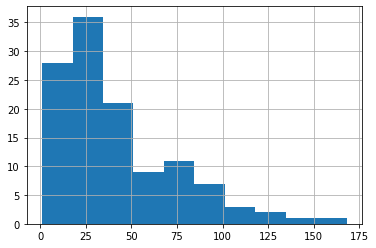

In [26]:
data_cleaned3['Ozone'].hist()

<AxesSubplot:>

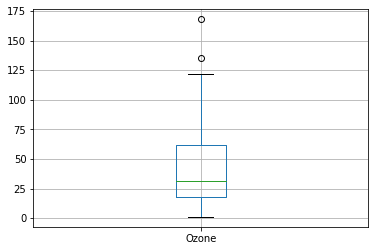

In [29]:
data_cleaned3.boxplot(column = ['Ozone'])

In [30]:
# Descriptive stats
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<AxesSubplot:>

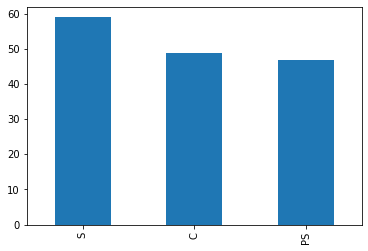

In [35]:
# Bar plot

data['Weather'].value_counts().plot.bar()

# Missing values and Imputation

In [38]:
data_cleaned3[data_cleaned3.isnull().any(axis = 1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [39]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [41]:
# Mean imputation

data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(data_cleaned3['Ozone'].mean())

In [42]:
data_cleaned3['Ozone']

0      41.000000
1      36.000000
2      12.000000
3      18.000000
4      41.815126
         ...    
152    20.000000
153    41.000000
154    30.000000
155    41.815126
157    18.000000
Name: Ozone, Length: 157, dtype: float64

<AxesSubplot:>

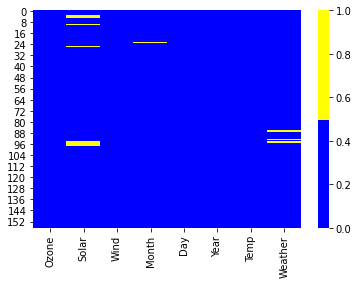

In [43]:
import seaborn as sns
cols = data_cleaned3.columns
colours = ['blue', 'yellow']
sns.heatmap(data_cleaned3[cols].isnull(),
           cmap = sns.color_palette(colours))

In [44]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [49]:
# Missing value imputation for categorical value
# GEt the object columns
obj_columns = data_cleaned3[['Weather']]

In [50]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [54]:
# Missing value imputation for categorical value
obj_columns = obj_columns.fillna(obj_columns.mode().iloc[0])

In [52]:
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [55]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [58]:
data_cleaned4 = data_cleaned3.iloc[:, :7]

In [59]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,41.000000,190.0,7.4,5.0,1,2010,67
1,36.000000,118.0,8.0,5.0,2,2010,72
2,12.000000,149.0,12.6,5.0,3,2010,74
3,18.000000,313.0,11.5,5.0,4,2010,62
4,41.815126,NaN,14.3,5.0,5,2010,56
...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68
153,41.000000,190.0,7.4,5.0,1,2010,67
154,30.000000,193.0,6.9,9.0,26,2010,70
155,41.815126,145.0,13.2,9.0,27,2010,77


In [60]:
data_cleaned4 = pd.concat([data_cleaned4, obj_columns], axis = 1)

In [61]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S


# Scatter Plot and Correlation Analysis

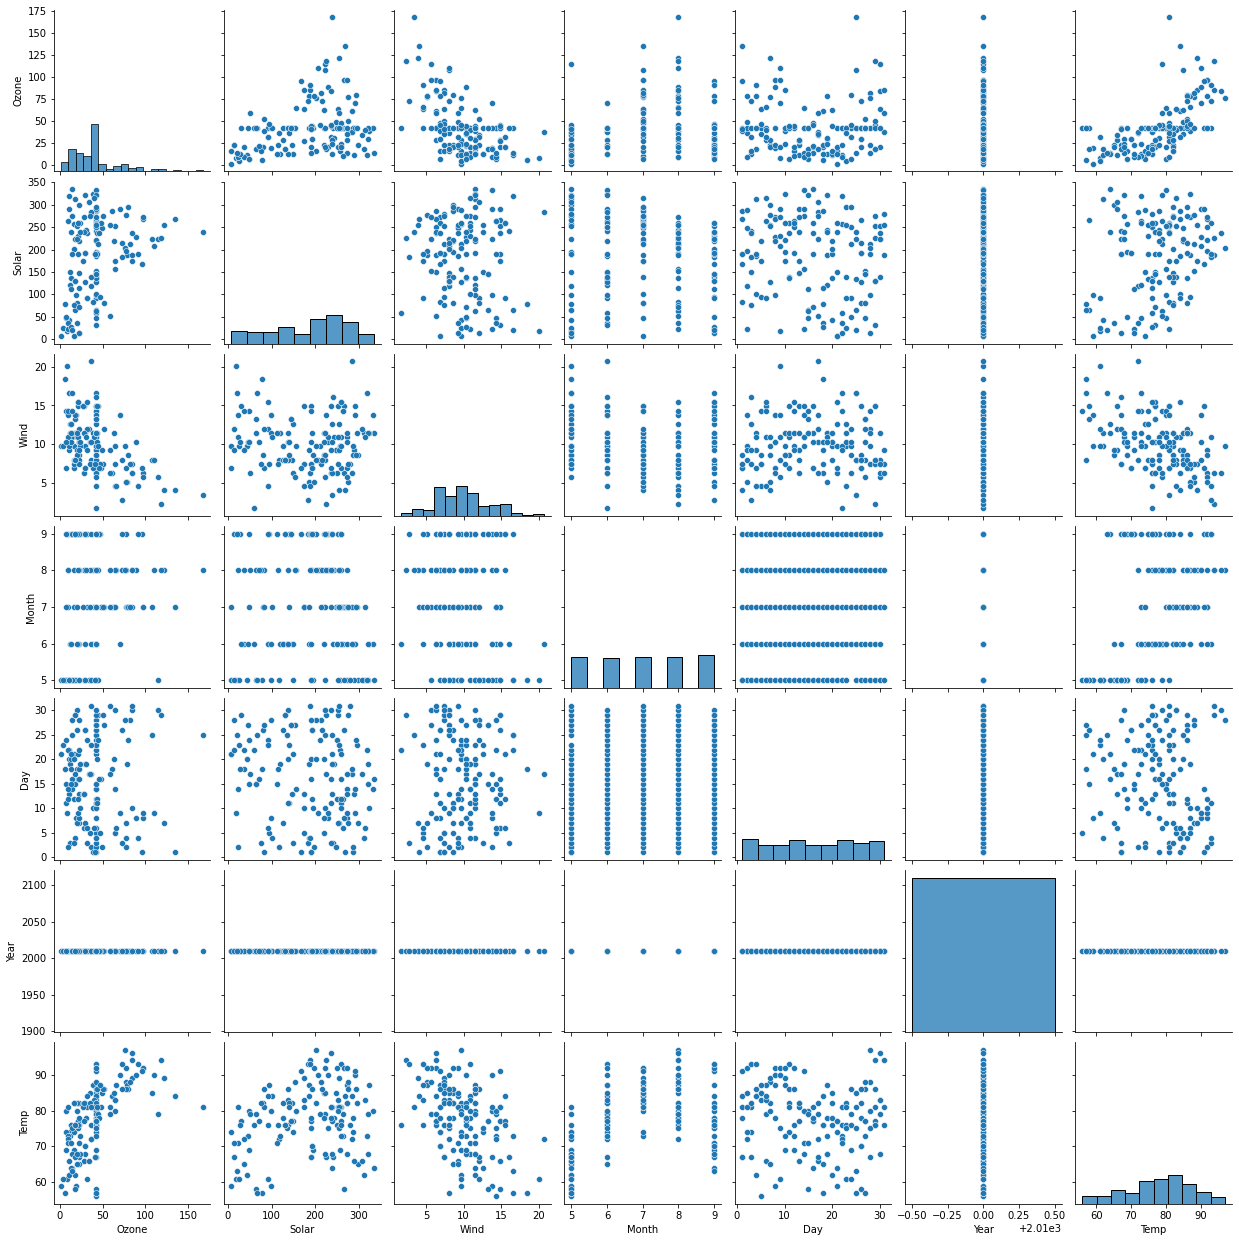

In [62]:
# Seaborn visualization library 
import seaborn as sns
# Create the default pairplot 
sns.pairplot(data_cleaned4)

In [63]:
# Correlation
data_cleaned4.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


In [64]:
data_cleaned4 = pd.get_dummies(data_cleaned3, columns = ['Weather'])

In [65]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,2010,62,0,0,1
4,41.815126,NaN,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.0,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.0,13.2,9.0,27,2010,77,0,0,1


# Normalization of the data

In [66]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


In [67]:
data_cleaned4.values

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [69]:
array = data_cleaned4.values

scalar = MinMaxScaler(feature_range=(0,1))
rescaledX = scalar.fit_transform(array[:, 0:5])

# Transformed data
set_printoptions(precision = 2)
print(rescaledX)

[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24  nan 0.66 0.   0.13]
 [0.16  nan 0.69 0.   0.17]
 [0.13 0.89 0.36 0.   0.2 ]
 [0.11 0.28 0.64 0.   0.23]
 [0.04 0.04 0.97 0.   0.27]
 [0.24 0.57 0.36 0.   0.3 ]
 [0.04  nan 0.27 0.   0.33]
 [0.09 0.76 0.42 0.   0.37]
 [0.06 0.87 0.39 0.   0.4 ]
 [0.08 0.82 0.48 0.   0.43]
 [0.1  0.18 0.61 0.   0.47]
 [0.08 1.   0.52 0.   0.5 ]
 [0.2  0.92 0.54 0.   0.53]
 [0.03 0.22 0.88 0.   0.57]
 [0.17 0.96 0.52 0.   0.6 ]
 [0.06 0.11 0.42 0.   0.63]
 [0.   0.   0.42 0.   0.67]
 [0.06 0.96 0.78 0.   0.7 ]
 [0.02 0.06 0.42 0.   0.73]
 [0.19 0.26 0.54  nan 0.77]
 [0.24 0.18 0.78 0.   0.8 ]
 [0.24 0.79 0.69 0.   0.83]
 [0.24  nan 0.33 0.   0.87]
 [0.13 0.02 0.54 0.   0.9 ]
 [0.26 0.75 0.69 0.   0.93]
 [0.68 0.66 0.21 0.   0.97]
 [0.22 0.83 0.3  0.   1.  ]
 [0.24 0.85 0.36 0.25 0.  ]
 [0.24 0.86 0.42 0.25 0.03]
 [0.24 0.72 0.76 0.25 0.07]
 [0.24 0.55 0.39 0.25 0.1 ]
 [0.24 0.65 0.36 0.2

In [70]:
# Standardize data (0 mean, 1 std dev)
from sklearn.preprocessing import StandardScaler

In [73]:
array = data_cleaned4.values
scalar = StandardScaler().fit(array)
rescaledX = scalar.transform(array)

# summarize transformed data

set_printoptions(precision = 2)
print(rescaledX)

[[-0.03  0.05 -0.72 ... -0.67 -0.65  1.31]
 [-0.21 -0.76 -0.55 ...  1.48 -0.65 -0.77]
 [-1.05 -0.41  0.76 ... -0.67  1.53 -0.77]
 ...
 [-0.42  0.09 -0.87 ... -0.67  1.53 -0.77]
 [ 0.   -0.45  0.94 ... -0.67 -0.65  1.31]
 [-0.84 -0.61 -0.55 ...  1.48 -0.65 -0.77]]


# Speed up the EDA Process

In [75]:
EDA_report = pp.ProfileReport(data1)
EDA_report.to_file(output_file = 'report.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:192: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]